<!-- Germany has very little natural gas reserves of its own and therefore has to import the
majority of its natural gas. The annual import of natural gas in Germany is around
100 billionm3 (=1000 billionkWh) in order to meet the corresponding demand (the coun-
try’s own natural gas reserves and the consumption already covered by them are already
excluded; these no longer have to be taken into account in the future).
Until February 2022, the demand for imported natural gas in Germany was composed
as follows (for the sake of simplicity, the respective quantities can be equated with the
technically available import capacities for the following calculations):
• 30 % from Russia (10 % via Nord-Stream-Pipeline (Baltic Sea), 10 % via Poland/Belarus,
10 % via Austria/Czech Republic/Slovakia/Ukraine)
• 30 % from Nord Sea (Norwegian waters)
• 25 % from The Netherlands/UK
• 10 % from Belgium
• 5 % from Denmark
Until February 2022, the corresponding gas volumes via the individual import routes were
offered at the transfer points to Germany at the following wholesale prices:
• Nord-Stream-Pipeline (Ostsee): 7 EUR/MWh
• Poland/Belarus: 9 EUR/MWh
• Austria/Czech Republic/Slovakia/Ukraine: 10 EUR/MWh
• Nord Sea (Norwegian waters): 8 EUR/MWh
• The Netherlands/UK: 12 EUR/MWh
• Belgium: 13 EUR/MWh
• Denmark: 15 EUR/MWh -->

<p style="text-align:center;">VU Selected Topic in Energy Economics and Environment</p>

<p style="text-align:center;">14.10.2024</p>
<p style="text-align:center;">Homework 1</p>

_a) Draw the supply curve for natural gas imports in Germany (axis labeling!) and determine the most expensive import route._

The given data from the assignment is seen in the table below.

| Import Route | Share [%] | Price [EUR/MWh] | Total MWh |Total Cost [Million EUR]|
|--------------|-----------|-----------------|-----------|-----------------------|
| Nord Stream       | 10        | 7              | 10^8        | 700                   |
| Poland/Belarus    | 10        | 9              | 10^8        | 900                   |
| Austria/Czech/Slovakia/Ukraine | 10 | 10 | 10^8^ | 1000 |
| Nord Sea          | 30        | 8              | 3*10^8        | 2400                  |
| The Netherlands/UK| 25        | 12             | 2.5*10^8        | 3000                  |
| Belgium           | 10        | 13             | 10^8        | 1300                  |
| Denmark           | 5         | 15             | 0.5*10^8         | 750                   |

Using the given data the following supply curve can be drawn. The most expensive import route, in total EUR, is the one from The Netherlands/UK.

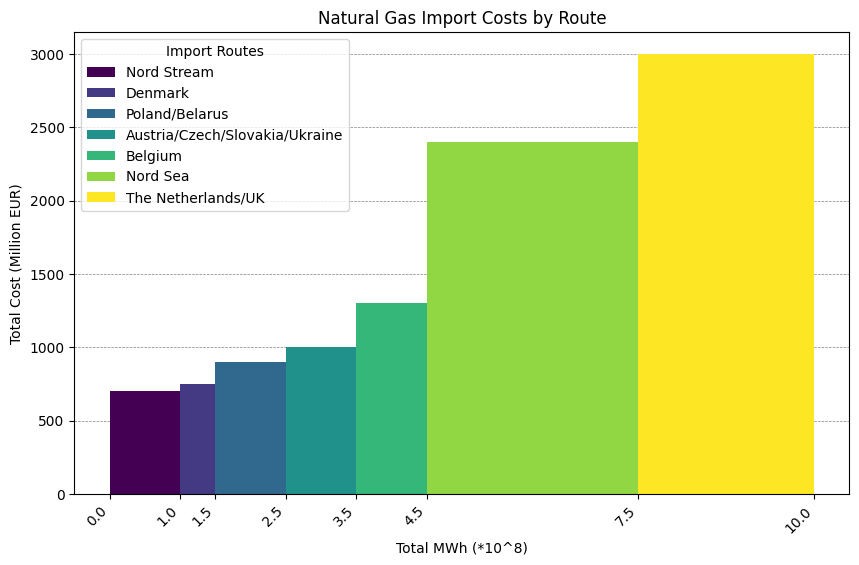

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
import_routes = ['Nord Stream', 'Poland/Belarus', 'Austria/Czech/Slovakia/Ukraine', 'Nord Sea', 'The Netherlands/UK', 'Belgium', 'Denmark']
total_mwh = [10**8, 10**8, 10**8, 3*10**8, 2.5*10**8, 10**8, 0.5*10**8]
total_cost = [700, 900, 1000, 2400, 3000, 1300, 750]

# Combine the data into a list of tuples and sort by total cost
data = list(zip(import_routes, total_mwh, total_cost))
data.sort(key=lambda x: x[2])

# Unzip the sorted data
import_routes_sorted, total_mwh_sorted, total_cost_sorted = zip(*data)

# Normalize the total_mwh_sorted values
total_mwh_normalized = [mwh / 10**8 for mwh in total_mwh_sorted]

# Generate colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(total_mwh_normalized)))

# Calculate the positions of the bars
bar_positions = np.cumsum([0] + total_mwh_normalized[:-1])

# Calculate the accumulated MWh for x-ticks
accumulated_mwh = np.cumsum([0] + list(total_mwh_sorted)) / 10**8

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal gray bars to the background
for y in range(0, 3500, 500):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

bars = plt.bar(bar_positions, total_cost_sorted, color=colors, width=total_mwh_normalized, align='edge')

# Add import route names below the x-axis numbers
plt.xticks(bar_positions + np.array(total_mwh_normalized), import_routes_sorted, rotation=45, ha='right')

# Add numbers to the x-axis based on accumulated total_mwh values
plt.gca().set_xticks(np.concatenate(([0], bar_positions + np.array(total_mwh_normalized))))
plt.gca().set_xticklabels([f'{mwh:.1f}' for mwh in accumulated_mwh])

# Add legend
for bar, route in zip(bars, import_routes_sorted):
    bar.set_label(route)
plt.legend(title='Import Routes')

plt.xlabel('Total MWh (*10^8)')
plt.ylabel('Total Cost (Million EUR)')
plt.title('Natural Gas Import Costs by Route')
plt.show()

---

_b) Based on the above, calculate the so-called IRD factor (Import Route Diversification)
for Germany. The IRD factor is defined as follows:_

\begin{equation}
IRD = \sum_{l} \left( IP_{X,~border,~l} \right)^2 + \sum_{m} \left( LNG_{terminal,~m} \right)^2
\end{equation}

As it's not specified if a route is a pipeline or a LNG terminal, it is assumed that all routes are pipelines. Using the data from the table above, the IRD factor can be calculated as follows:

\begin{equation}
IRD = \left( 0.1^2 + 0.1^2 + 0.1^2 + 0.3^2 + 0.25^2 + 0.1^2 + 0.05^2 \right) = 0.165
\end{equation}

As an IRD of 1 means a monopoly, and 0 means perfect competition, the IRD factor of 0.165 indicates a relatively low level of market concentration.

---

_c) It has already been assumed in previous years (i.e. before February 2022) that due to
political tensions with both Ukraine and Belarus, there may be supply interruptions
at any time and the 2 corresponding gas import routes to Germany are no longer
fully available (i.e. it is assumed that the 3rd route (Baltic Sea pipelines) is still fully
available). If it is now assumed that a corresponding loss of imports of ”Russian gas”
via these 2 routes to 80 % is compensated by newly built LNG terminals on the coast
of northern Germany and to 20 % by import capacity expansions from the North Sea
(Norwegian waters): What is the new IRD factor for Germany according to this new
situation?_

The two routes that are no longer fully available are Poland/Belarus and Austria/Czech/Slovakia/Ukraine. The losses are covered by $0.2*0.8 = 0.16$ from the North Sea and $0.2*0.2 = 0.04$ from the new LNG terminals. The new IRD factor is calculated as follows:

\begin{equation}
IRD = \left( 0.1^2 + (0.3 + 0.16)^2 + 0.25^2 + 0.1^2 + 0.05^2 \right) + \left(0.04^2\right) = 0.1656
\end{equation}

The increase in IRD is expected as the diversification of import routes decreases by the removal of two routes.